In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

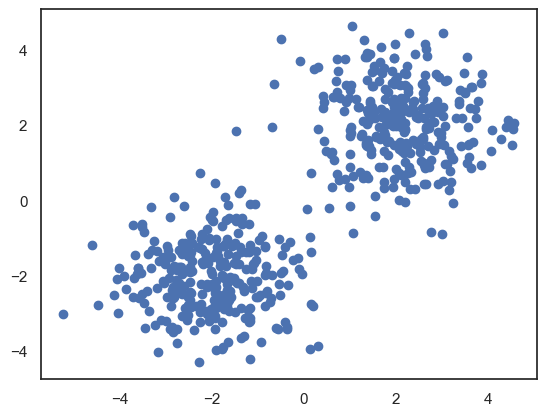

In [19]:
from sklearn.datasets import make_blobs
blobs = make_blobs([300, 300], 2, centers = [(-2,-2),(2,2)],random_state=42)[0]
plt.scatter(blobs[:,0], blobs[:,1])

/Users/asajad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='X1', ylabel='X2'>

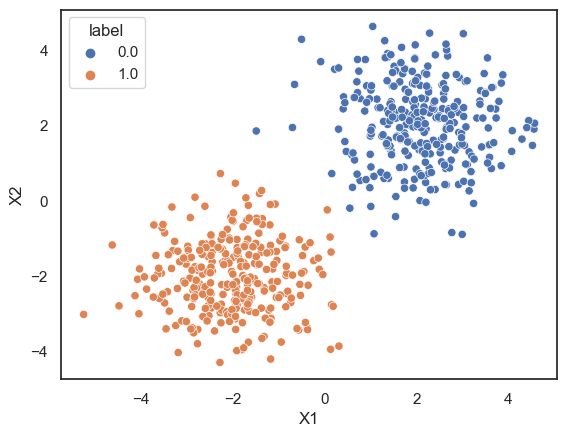

In [20]:
from sklearn.cluster import KMeans

kmean = KMeans(2)
kmean.fit(blobs)
blobs = np.c_[blobs, kmean.predict(blobs)]
df = pd.DataFrame(blobs, columns = ["X1", "X2", "label"])
sns.scatterplot(data = df, x = "X1", y = "X2", hue = "label")

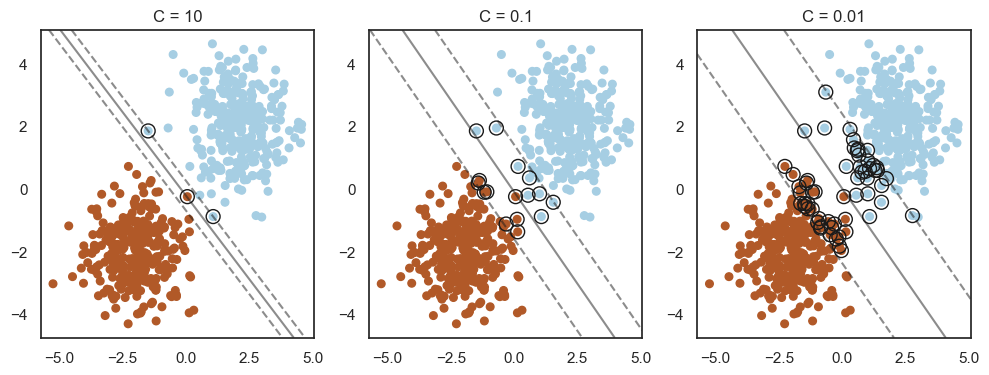

In [26]:
from utils import plot_svm_margins
from sklearn.svm import SVC
X, y = df.drop("label", axis="columns").to_numpy(), df["label"].to_numpy()
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4))

for i, C in enumerate([10, 0.1, 0.01], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="linear", C=C), X, y)
    ax[i-1].set_title(f"C = {C}, linear kernel")

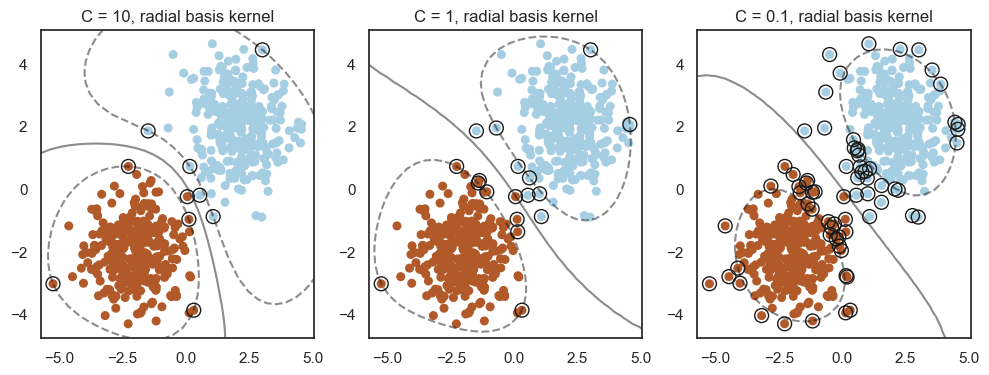

In [27]:
X, y = df.drop("label", axis="columns").to_numpy(), df["label"].to_numpy()
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4))

for i, C in enumerate([10, 1, 0.1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="rbf", C=C), X, y)
    ax[i-1].set_title(f"C = {C}, radial basis kernel")

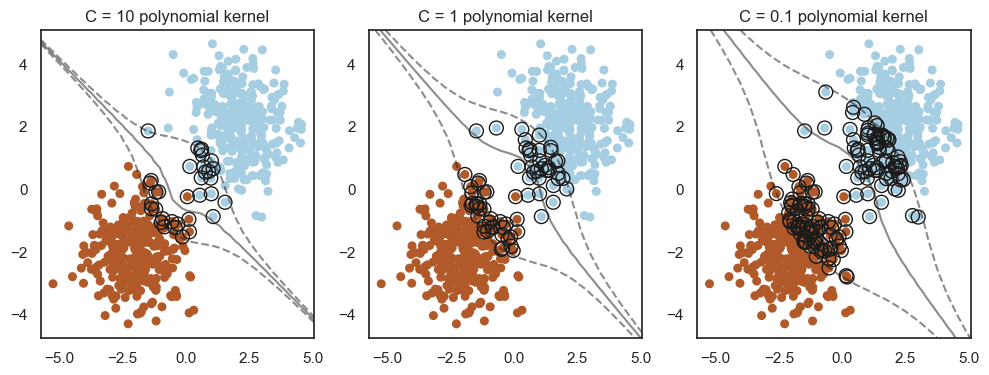

In [29]:
X, y = df.drop("label", axis="columns").to_numpy(), df["label"].to_numpy()
fig, ax = plt.subplots(1, 3, dpi=100, figsize=(12, 4))

for i, C in enumerate([10, 1, 0.1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="poly", C=C), X, y)
    ax[i-1].set_title(f"C = {C} polynomial kernel")

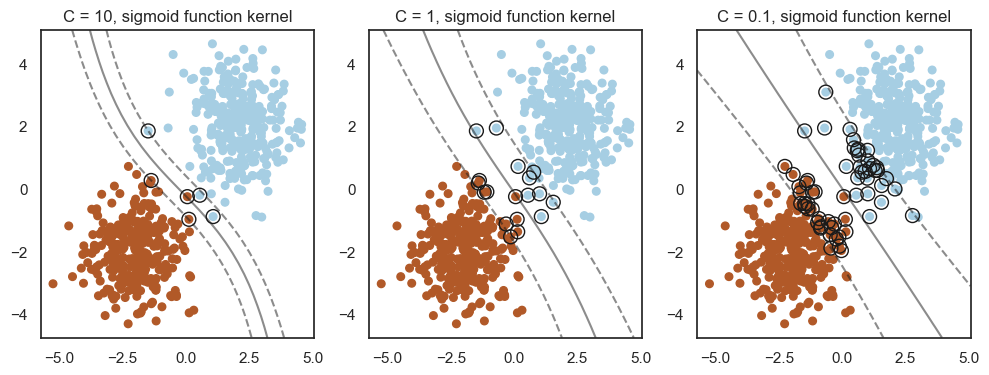

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# C is regularization (budget) parameter - makes margin more soft
for i, C in enumerate([10, 1, 0.1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="sigmoid", C=C), X, y)
    plt.title(f"C = {C}, sigmoid function kernel")